In [19]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../"))

import desc
from desc.objectives import (
    ObjectiveFunction,
    ForceBalance,
    Energy,
    FixThetaSFL, 
    FixModeR, 
    FixModeZ, 
    FixModeLambda,
    QuasisymmetryTwoTerm,
    AspectRatio,
)
from desc.basis import ZernikePolynomial, FourierZernikeBasis,FourierZernike_to_FourierZernike_no_N_modes,get_basis_poincare, DoubleFourierSeries
from desc.transform import Transform
from desc.equilibrium import EquilibriaFamily, Equilibrium
from desc.plotting import plot_1d,plot_2d,plot_3d,plot_comparison, plot_section, plot_fsa, plot_surfaces, plot_boozer_surface
from desc.optimize import Optimizer
from desc.perturbations import *
import numpy as np
from desc.geometry import FourierRZToroidalSurface, ZernikeRZToroidalSection, PoincareSurface
%matplotlib inline
from desc.utils import copy_coeffs, print_modes_coefs
import matplotlib.pyplot as plt
from desc.examples import get
from desc.objectives.getters import get_fixed_boundary_constraints, get_fixed_xsection_constraints, maybe_add_self_consistency
from desc.grid import LinearGrid
import plotly.graph_objects as go

In [10]:
eq = get("precise_QA")
eqpN2 = desc.io.load("precise_QA_poincare_N2.h5")

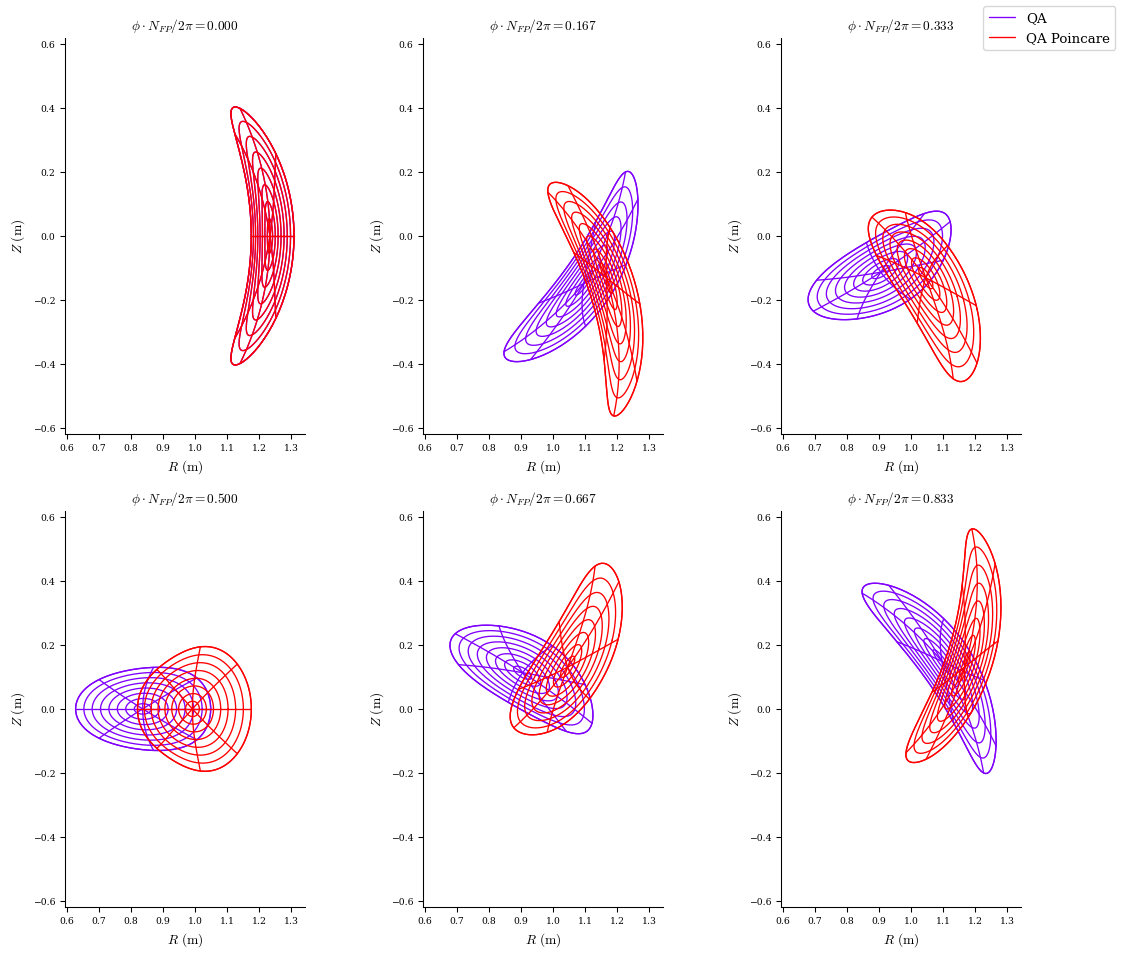

In [16]:
plot_comparison(eqs=[eq,eqp], labels=["QA","QA Poincare"]);

In [15]:
# eqp =eq.set_poincare_equilibrium()
eqp = desc.io.load("precise_QA_poincare_N2.h5")
constraints = (
    *get_fixed_boundary_constraints(eq=eqp),
    ForceBalance(eq=eqp),
)
objective = ObjectiveFunction(
    (
        # pass in the grid we defined, and don't forget the target helicity!
        QuasisymmetryTwoTerm(eq=eqp, helicity=(0, eq.NFP)),
    ),
)
optimizer = Optimizer("lsq-auglag")
eqp.optimize(
    objective=objective,
    constraints=constraints,
    optimizer=optimizer,
    # each iteration of the augmented Lagrangian optimizer is cheaper than a step of a
    # proximal optimizer, but it generally requires more iterations to converge
    maxiter=200,
    copy=True,
    verbose=3,
    options={},
);

Building objective: QS two-term
Precomputing transforms
Timer: Precomputing transforms = 51.5 ms
Timer: Objective build = 204 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed-Psi
Building objective: fixed-pressure
Building objective: fixed-current
Building objective: self_consistency section R
Building objective: self_consistency section Z
Building objective: self_consistency section Lambda
Building objective: self_consistency boundary R
Building objective: self_consistency boundary Z
Building objective: self_consistency axis R
Building objective: self_consistency axis Z
Building objective: lambda gauge
Timer: Objective build = 759 ms
Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 76.2 ms
Timer: Objective build = 254 ms
Timer: Linear constraint projection build = 3.12 sec
Timer: Linear constraint projection build = 79.0 ms
Number of parameters: 250
Number of objectives: 357
Number of equality constraints: 3402
Number

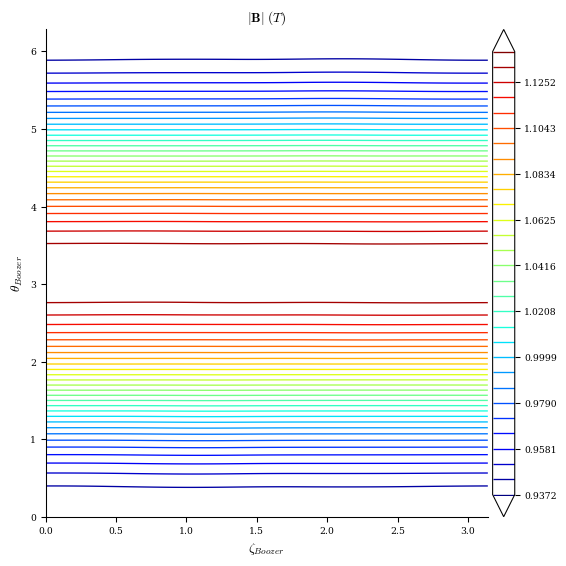

In [23]:
plot_boozer_surface(eq);

In [1]:
from desc.io import load_to_database
load_to_database("precise_QA_poincare_N3", "precise_QA")

DESC version 0.11.0+24.g2d9244f82.dirty,using JAX backend, jax version=0.4.25, jaxlib version=0.4.25, dtype=float64
Using device: CPU, with 8.50 GB available memory
Previous desc_runs.csv has been deleted.
Previous configurations.csv has been deleted.

Creating desc_runs.csv and configurations.csv...



/home/yigit/Codes/DESC/desc/io/hdf5_io.py:206: RuntimeWarning: Class 'desc.geometry.surface.PoincareSurface' could not be imported.
  warnings.warn(
/home/yigit/Codes/DESC/desc/io/hdf5_io.py:125: RuntimeWarning: Save attribute '_bdry_mode' was not loaded.
  warnings.warn(


Configuration data already exists in the database.
DESC data already exists in the database.




Fatal error: Uncaught ValueError: Path cannot be empty in /home/ye2698/public_html/desc-database/upload_input_file.php:204 Stack trace: #0 /home/ye2698/public_html/desc-database/upload_input_file.php(204): move_uploaded_file('/tmp/phpLIFO5C', '') #1 {main} thrown in /home/ye2698/public_html/desc-database/upload_input_file.php on line 204
